## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
#from scipy.stats import linegress
#from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview
combined_df = pd.merge(mouse_metadata, study_results, how='inner', on="Mouse ID")
combined_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_count = combined_df["Mouse ID"].count()
mouse_count


1893

In [29]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_rows



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [3]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_rows = combined_df[combined_df.duplicated("Mouse ID",)]
all_duplicate_rows


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates("Mouse ID")
clean_df

#In a newly created dataframe there 249 rows, containing 249 mice in the clean data frame


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [5]:
# As it was mentioned above we had the statement of 249 mice in each row(249) in the clean dataframe. Checking one more time
# Checking the number of mice in the clean DataFrame.
mouse_count = clean_df["Mouse ID"].count()
mouse_count

249

## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

clean_df = combined_df.drop_duplicates("Mouse ID")
clean_df.head()

mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_dv = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_df.head()                           
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0


In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method was an my tutor's suggestion  at the end.


regimen_mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_mean


regimen_median = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_median


regimen_variance = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_variance


regimen_std = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_std

regimen_sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
regimen_sem

Drug Regimen
Capomulin    0.0
Ceftamin     0.0
Infubinol    0.0
Ketapril     0.0
Naftisol     0.0
Placebo      0.0
Propriva     0.0
Ramicane     0.0
Stelasyn     0.0
Zoniferol    0.0
Name: Tumor Volume (mm3), dtype: float64

## Bar and Pie Charts

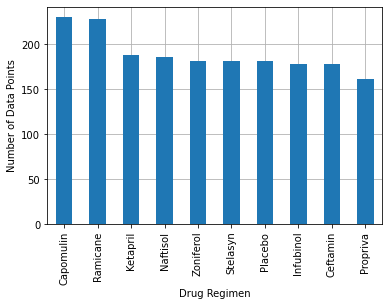

In [34]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

bar_plot = combined_df["Drug Regimen"].value_counts().plot.bar(width=0.5, zorder=4)

#Setting labels for axes
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Data Points")
# About zorder: zorder is uded for moving objects to the foreground or background.
#https://towardsdatascience.com/simple-ways-to-improve-your-matplotlib-b64eebccfd5
                                                          
bar_plot.grid(zorder=0)                                                          

In [35]:
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


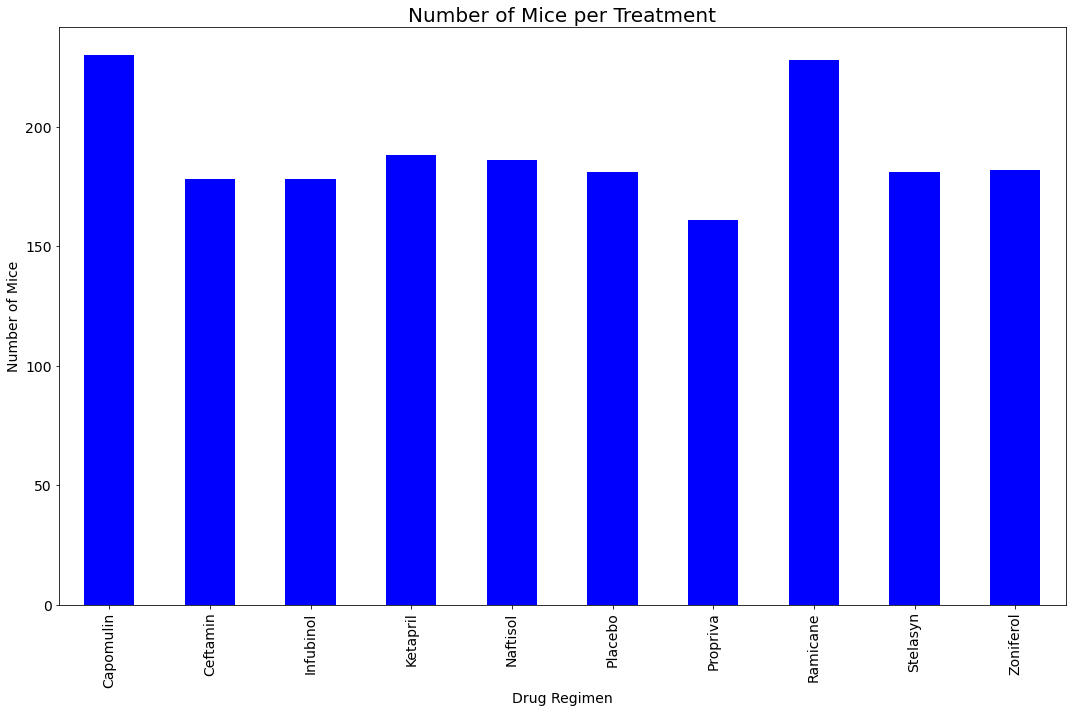

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [36]:


count_mice_per_tret = combined_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 



plot_pandas = count_mice_per_tret.plot.bar(figsize=(15,10), color='b',fontsize = 14)
count_mice_per_tret
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)
plt.title("Number of Mice per Treatment",fontsize = 20)

plt.savefig("../Images/Pan_mice_per_treat.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

count_mice_per_tret


In [37]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

cleaned_df = pd 

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_df = pd.DataFrame(combined_df.groupby(["Sex"]).count()).reset_index()
gender_df.head()

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [7]:
#Alter the dataframe down to two columns
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df.head()

,Sex,Mouse ID
0,Female,935
1,Male,958


Text(0, 0.5, '')

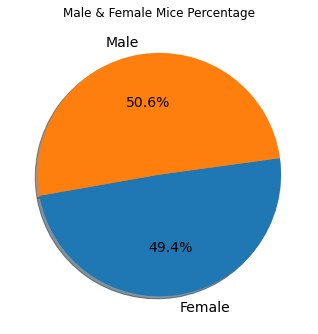

In [8]:
plt.figure(figsize=(12,6))
ax1 = plt.subplot(121, aspect="equal")
gender_df.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct='%1.1f%%',
              startangle=190, shadow=True, labels=gender_df["Sex"], legend = False, fontsize=14)

plt.title("Male & Female Mice Percentage")
plt.xlabel("")
plt.ylabel("")

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Distribution of data by gender
#data_by_gender = combined_df["Sex"].value_counts()

# Tell matplotlib to create a pie chart filled with corresponding percentages and displayed vertically
#plt.pie(combined, labels=data.index.values, autopct="%1.1f%%", startangle=90)
#plt.title('Distribution by Sex')

# Display resulting plot
#plt.show()
# Generate a pie plot showing the distribution of female versus male mice using pyplot
combined_df.head()
gender_count = (combined_df.groupby(["Sex"])["Age_months"].count()).tolist()

gender_count


[935, 958]

In [9]:
#Adding details to the pie chart
labels = ["Females", "Males"]
colors = ["purple", "orange"]
explode = (0.1, 0) 
#Create a pie chart
plt.pie(gender_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal") 


NameError: name 'gender_count' is not defined

## Quartiles, Outliers and Boxplots

In [10]:
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_df.head()
Capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = combined_df.loc[combined_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = combined_df.loc[combined_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = combined_df.loc[combined_df["Drug Regimen"] == "Ceftamin", :]

# Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, combined_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [12]:
# Capomulin quartiles and IQR
# Determine outliers using upper and lower bounds
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [13]:
# Ramicane

Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, combined_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()
Ramicane_merge.to_csv("output.csv")


In [14]:
# Ramicane quartiles and IQR
# Determine outliers using upper and lower bounds
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [15]:
# Infubinol 
# Determine outliers using upper and lower bounds

Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, combined_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [50]:
# Ceftamin
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, combined_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [16]:
# Ceftamin quartiles and IQR
# Determine outliers using upper and lower bounds

Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


NameError: name 'Ceftamin_merge' is not defined

In [17]:
data_to_plot = [Capomulin, Ramicane, Infubinol, Ceftamin]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume at Selected Mouse',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)

plt.savefig("../Images/box_plot.png", bbox_inches = "tight")

plt.show()

NameError: name 'Capomulin' is not defined

In [18]:
sorted_df = combined_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
last_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
last_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

# Plot boxplot
plt.boxplot(drug_values, flierprops=flierprops)

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])


NameError: name 'drug_values' is not defined

## Line and Scatter Plots

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [21]:
forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "b742",:]
forline_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
290,b742,Capomulin,Male,7,21,0,45.000000,0
291,b742,Capomulin,Male,7,21,5,41.534097,0
292,b742,Capomulin,Male,7,21,10,41.999228,0
293,b742,Capomulin,Male,7,21,15,39.524843,0
294,b742,Capomulin,Male,7,21,20,37.950355,0


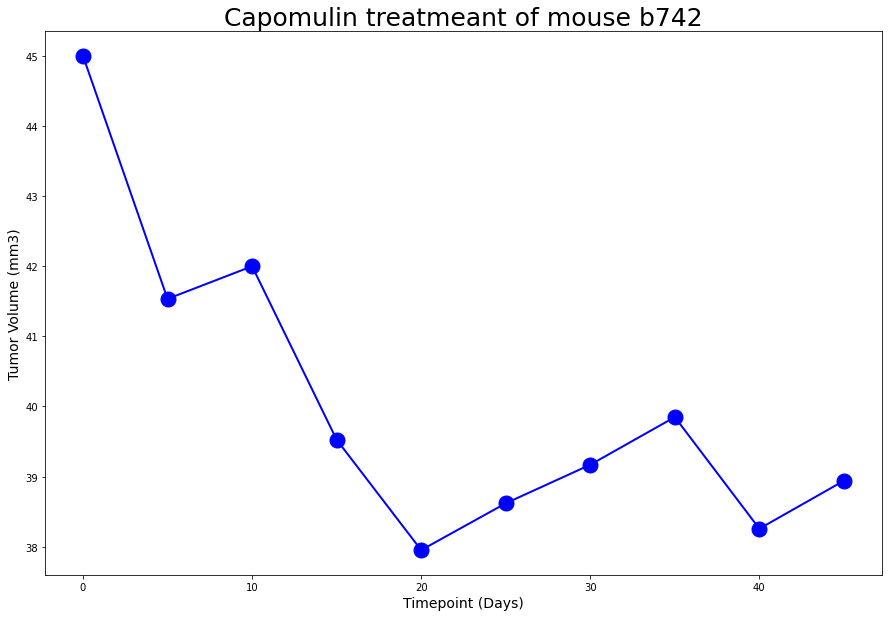

In [58]:
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin treatmeant of mouse b742',fontsize =25)
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)


plt.savefig("../Images/line_graph.png", bbox_inches = "tight")
plt.show()


In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df.head()


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


## Correlation and Regression

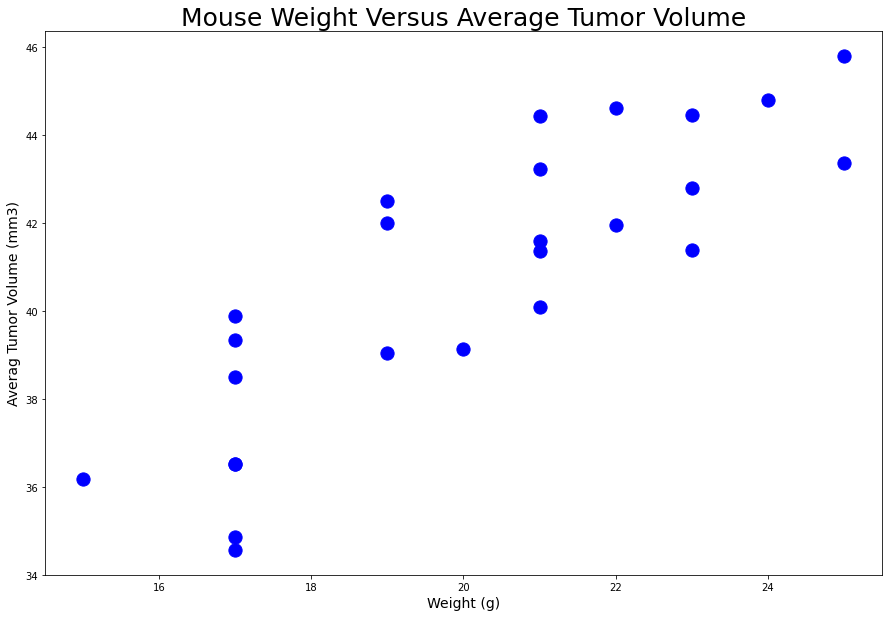

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(15, 10))
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'],s=175, color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =25)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =14)


plt.savefig("../Images/scatterplot.png", bbox_inches = "tight")
plt.show()


In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [26]:
capomulin_df = data_df.loc[data_df['Drug Regimen'] == 'Capomulin']
data_df
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df
x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()

NameError: name 'data_df' is not defined

NameError: name 'regress_values' is not defined

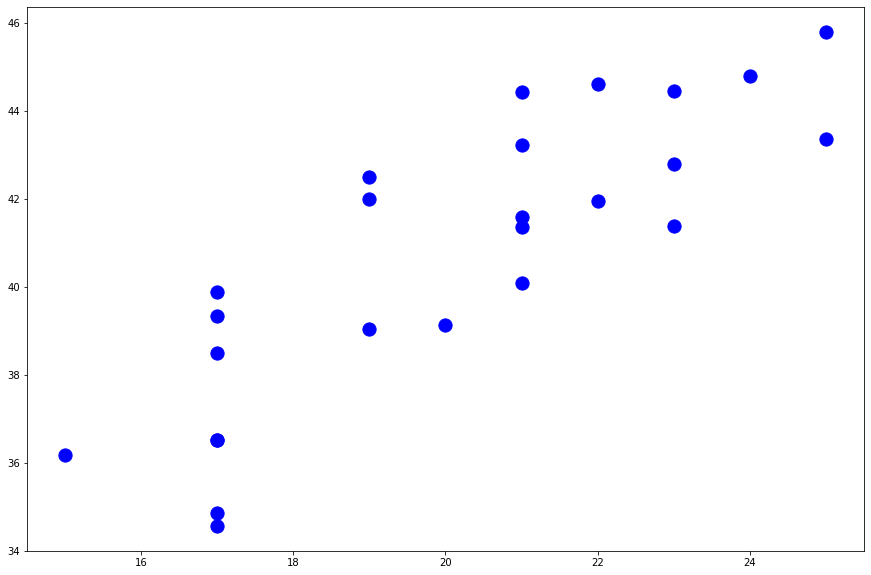

In [63]:
 # Linear regression model
 # Add the linear regression equation and line to plot
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,s=175, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot of Mouse Weight Versus Average Tumor Volume',fontsize =20)
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =14)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.savefig("../Images/linear_regression.png", bbox_inches = "tight")
plt.show()   